In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [29]:
# Import useful libraries and classes.
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

In [30]:
#html upload
my_url=  "http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1950,2012"
uClient= uReq(my_url)
page_html= uClient.read()
uClient.close()

In [31]:
page_html

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Feature Film,\nReleased between 1950-01-01 and 2012-12-31\n(Sorted by Number of Votes Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "Loa

In [32]:
#html parser
page_soup= soup(page_html)
page_soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Feature Film,
Released between 1950-01-01 and 2012-12-31
(Sorted by Number of Votes Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTi

In [33]:
containers= page_soup.findAll("div", {"class": "lister-item mode-advanced"})
print(len(containers))

50


In [34]:
containers

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt0111161"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" class="loadlate" data-tconst="tt0111161" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">A</span>
 <span class="ghost">|</span>
 <span class="runtime">142 min</span>
 <span class="ghost">|</span>
 <span 

In [35]:
for container in containers:
    name= container.img["alt"]
    print(name)

The Shawshank Redemption
The Dark Knight
Inception
Fight Club
Pulp Fiction
Forrest Gump
The Matrix
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Return of the King
The Godfather
The Dark Knight Rises
The Lord of the Rings: The Two Towers
Se7en
Django Unchained
Gladiator
Batman Begins
The Silence of the Lambs
Inglourious Basterds
The Avengers
Saving Private Ryan
Star Wars
Schindler's List
The Prestige
The Departed
Star Wars: Episode V - The Empire Strikes Back
The Green Mile
Shutter Island
The Godfather: Part II
Memento
Avatar
American Beauty
Back to the Future
Titanic
Léon
American History X
V for Vendetta
Goodfellas
Pirates of the Caribbean: The Curse of the Black Pearl
Kill Bill: Vol. 1
WALL·E
Terminator 2: Judgment Day
The Usual Suspects
Braveheart
Star Wars: Episode VI - Return of the Jedi
Finding Nemo
The Lion King
The Truman Show
Iron Man
Up
Reservoir Dogs


## Bank marketing case study

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df =  pd.read_csv('bank_marketing_updated_v1.csv',skiprows=2)

In [23]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [17]:
df.age= df.age.dropna().astype(int)

In [18]:
df.age.mean()

40.93565090394105

In [20]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [21]:
df.shape

(45211, 19)

In [25]:
df.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [28]:
df = df[~df.age.isna()]

In [31]:
df.age = df.age.astype(int)

E:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
df.dtypes

customerid     int64
age            int32
salary         int64
balance        int64
marital       object
jobedu        object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration      object
campaign       int64
pdays          int64
previous       int64
poutcome      object
response      object
dtype: object

In [33]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45191.000000,45191.000000,45191.000000,45191.000000,45191.000000,45191.000000,45191.000000
mean,22607.477108,40.935651,57005.974641,1362.432520,15.806289,2.763847,40.181253,0.579983
std,13050.447521,10.619198,32084.253154,3045.120417,8.322311,3.098407,100.074099,2.303017
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11305.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22608.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [38]:
df.drop('customerid',inplace=True,axis=1)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [40]:
df['job']=df.jobedu.apply(lambda x:x.split(',')[0])
df['edu']=df.jobedu.apply(lambda x:x.split(',')[1])
df.drop('jobedu',inplace=True,axis=1)
df.head()

<ipython-input-40-d22b8e2cdceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=df.jobedu.apply(lambda x:x.split(',')[0])
<ipython-input-40-d22b8e2cdceb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edu']=df.jobedu.apply(lambda x:x.split(',')[1])


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [41]:
df.drop('jobedu',inplace=True,axis=1)
df.head()

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [44]:
df['months']=df.month.apply(lambda x:x.split(',')[0])
df.head()

AttributeError: 'float' object has no attribute 'split'

In [53]:
df[~df.isnull()]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [55]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [56]:
df=df[~df.age.isnull()].copy()

In [57]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [58]:
df.month.value_counts()

may, 2017    13740
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [60]:
df.month.fillna('may, 2017',inplace=True)

In [61]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [62]:
df.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [67]:
df.loc[df.pdays<0,'pdays']=np.NaN

In [68]:
df.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [69]:
df.isnull().sum()

age             0
salary          0
balance         0
marital         0
targeted        0
default         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays       36939
previous        0
poutcome        0
response       30
job             0
edu             0
dtype: int64

In [73]:
(df.response.isnull().sum()*100)/df.response.count()

0.06642899847213303

### handling outliers

In [74]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:>

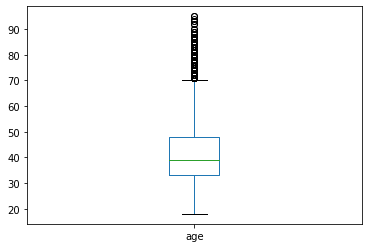

In [75]:
df.age.plot.box()

<AxesSubplot:xlabel='age'>

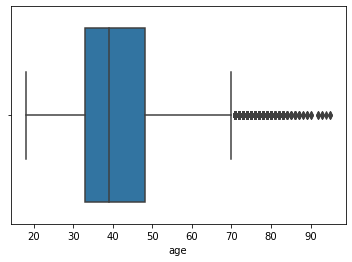

In [76]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='balance'>

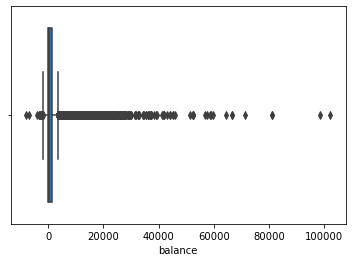

In [77]:
sns.boxplot(df.balance)

In [78]:
df.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

#### percentile

In [79]:
df.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [81]:
df.salary.quantile([0.5,0.75,0.9,0.95,0.99])

0.50     60000.0
0.75     70000.0
0.90    100000.0
0.95    100000.0
0.99    120000.0
Name: salary, dtype: float64

In [82]:
df.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

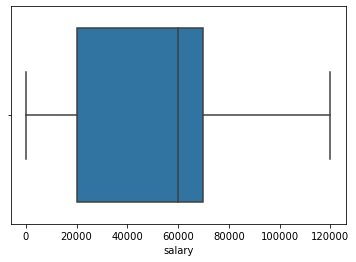

In [83]:
sns.boxplot(df.salary)

## Standarise variable

In [84]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


In [86]:
df.duration.unique()

array(['261 sec', '151 sec', '76 sec', ..., '20.7666666666667 min',
       '25.9333333333333 min', '16.2833333333333 min'], dtype=object)

In [87]:
df.duration = df.duration.apply(lambda x:float(x.split(' ')[0])/60 if x.find('sec')>0 else x.split(' ')[0])

0                    4.35
1                 2.51667
2                 1.26667
3                 1.53333
4                     3.3
               ...       
45206    16.2833333333333
45207                 7.6
45208    18.7833333333333
45209    8.46666666666667
45210    6.01666666666667
Name: duration, Length: 45191, dtype: object

In [88]:
df.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

# Graded assignments

In [90]:
df1 = pd.read_csv('Attribute+DataSet.csv')

In [91]:
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [92]:
df1.dtypes

Dress_ID            int64
Style              object
Price              object
Rating            float64
Size               object
Season             object
NeckLine           object
SleeveLength       object
Material           object
FabricType         object
Decoration         object
Pattern Type       object
Recommendation      int64
dtype: object

In [93]:
df1.Price.unique()

array(['Low', 'High', 'Average', 'Medium', 'very-high', nan], dtype=object)

In [94]:
df1.Recommendation.unique()

array([1, 0], dtype=int64)

In [95]:
df1.Recommendation.describe()

count    479.000000
mean       0.427975
std        0.495302
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Recommendation, dtype: float64

In [96]:
df1.Recommendation.value_counts()

0    274
1    205
Name: Recommendation, dtype: int64

In [98]:
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [99]:
df1.Dress_ID.value_counts()

1010356223    1
520233308     1
850586379     1
537463111     1
1027818824    1
             ..
944641715     1
1199064757    1
736813752     1
732650169     1
1117997056    1
Name: Dress_ID, Length: 479, dtype: int64

In [100]:
df2=pd.read_csv('Dress+Sales.csv')
df2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [101]:
df1.Size.value_counts()

M        171
free     165
L         93
S         34
XL        14
small      1
s          1
Name: Size, dtype: int64

In [104]:
df1.Size = df1.Size.apply(lambda x:'Medium' if x=='M' else x)
df1.Size = df1.Size.apply(lambda x:'Large' if x=='L' else x)
df1.Size = df1.Size.apply(lambda x:'Extra large' if x=='XL' else x)
df1.Size = df1.Size.apply(lambda x:'Free' if x=='Free' else x)
df1.Size = df1.Size.apply(lambda x:'Small' if x=='S' else x)
df1.Size = df1.Size.apply(lambda x:'Small' if x=='s' else x)
df1.Size = df1.Size.apply(lambda x:'Small' if x=='small' else x)
df1.Size.value_counts()

Medium         171
free           165
Large           93
Small           36
Extra large     14
Name: Size, dtype: int64

In [105]:
df1.Size.describe()

count        479
unique         5
top       Medium
freq         171
Name: Size, dtype: object

In [109]:
(df1.Size.value_counts()*100)/df1.Size.size

Medium         35.699374
free           34.446764
Large          19.415449
Small           7.515658
Extra large     2.922756
Name: Size, dtype: float64

In [110]:
df2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [112]:
df2.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013     object
14-09-2013     object
16-09-2013     object
18-09-2013     object
20-09-2013     object
22-09-2013     object
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

In [116]:
df2['09-12-2013'].astype(float)

ValueError: could not convert string to float: 'Removed'

In [126]:
df2['09-12-2013'] = df2['09-12-2013'].apply(lambda x:np.NaN if x=='Removed' else x)

In [127]:
df2['09-12-2013'].astype(float)

0      3119.0
1      1558.0
2        10.0
3      1723.0
4      1638.0
        ...  
474      67.0
475     525.0
476     694.0
477     268.0
478     578.0
Name: 09-12-2013, Length: 479, dtype: float64

In [129]:
df2.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      1
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

In [133]:
df1.Season.value_counts()

Summer    154
Spring    116
Winter     94
Automn     59
winter     45
Autumn      7
spring      2
Name: Season, dtype: int64

In [135]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [149]:
df2['14-09-2013'] = df2['14-09-2013'].apply(lambda x:np.NaN if x=='Orders' else x)
df2['16-09-2013'] = df2['16-09-2013'].apply(lambda x:np.NaN if x=='Orders' else x)
df2['18-09-2013'] = df2['18-09-2013'].apply(lambda x:np.NaN if x=='Orders' else x)
df2['20-09-2013'] = df2['20-09-2013'].apply(lambda x:np.NaN if x=='Orders' else x)
df2['22-09-2013'] = df2['22-09-2013'].apply(lambda x:np.NaN if x=='Orders' else x)

#df2['09-12-2013'] = df2['09-12-2013'].astype(float)
df2['14-09-2013'] = df2['14-09-2013'].astype(float)
df2['16-09-2013'] = df2['16-09-2013'].astype(float)
df2['18-09-2013'] = df2['18-09-2013'].astype(float)
df2['20-09-2013'] = df2['20-09-2013'].astype(float)
df2['22-09-2013'] = df2['22-09-2013'].astype(float)

#  8   09-12-2013  478 non-null    object 
#  9   14-09-2013  479 non-null    object 
#  10  16-09-2013  479 non-null    object 
#  11  18-09-2013  479 non-null    object 
#  12  20-09-2013  479 non-null    object 
#  13  22-09-2013  479 non-null    object

In [150]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [157]:
#summer
df2[['09-06-2013','09-08-2013','10-06-2013','29-08-2013','31-08-2013']].sum()

09-06-2013    145973
09-08-2013    151620
10-06-2013    198948
29-08-2013     94883
31-08-2013    100483
dtype: int64

In [156]:
#Autumn
df2[['14-09-2013','16-09-2013','18-09-2013','20-09-2013','20-09-2013','22-09-2013','24-09-2013','26-09-2013','28-09-2013',
     '30-09-2013','10-10-2013','09-10-2013']].sum()

14-09-2013    162792.0
16-09-2013    165318.0
18-09-2013    167833.0
20-09-2013    172351.0
20-09-2013    172351.0
22-09-2013    176414.0
24-09-2013    178638.0
26-09-2013     75944.0
28-09-2013    186614.0
30-09-2013     53483.0
10-10-2013     58825.0
09-10-2013    153328.0
dtype: float64

In [155]:
#Autumn
df2[['09-12-2013','10-12-2013','09-02-2013','10-02-2013']].sum()

09-12-2013    159693.0
10-12-2013    207909.0
09-02-2013    107081.0
10-02-2013     54466.0
dtype: float64

In [154]:
df2[['09-04-2013','10-04-2013']].sum()

09-04-2013    143600.0
10-04-2013     55484.0
dtype: float64

In [161]:
df2.sum()

Dress_ID      4.321739e+11
29-08-2013    9.488300e+04
31-08-2013    1.004830e+05
09-02-2013    1.070810e+05
09-04-2013    1.436000e+05
09-06-2013    1.459730e+05
09-08-2013    1.516200e+05
09-10-2013    1.533280e+05
09-12-2013    1.596930e+05
14-09-2013    1.627920e+05
16-09-2013    1.653180e+05
18-09-2013    1.678330e+05
20-09-2013    1.723510e+05
22-09-2013    1.764140e+05
24-09-2013    1.786380e+05
26-09-2013    7.594400e+04
28-09-2013    1.866140e+05
30-09-2013    5.348300e+04
10-02-2013    5.446600e+04
10-04-2013    5.548400e+04
10-06-2013    1.989480e+05
10-08-2013    5.789000e+04
10-10-2013    5.882500e+04
10-12-2013    2.079090e+05
dtype: float64

In [162]:
df2['31-08-2013'].sum()

100483

In [163]:
df2['Spring'] = df2.apply(lambda x: x['09-04-2013'], axis=1)


df2['Summer'] = df2.apply(lambda x: x['29-08-2013'] + x['31-08-2013'] + x['09-06-2013'] + x['09-08-2013'] + x['10-06-2013'], axis=1)

df2['Winter'] = df2.apply(lambda x: x['09-02-2013'] + x['09-12-2013'] + x['10-12-2013'], axis=1)

df2['Autumn'] = df2.apply(lambda x: x['09-10-2013'] + x['14-09-2013'] + x['16-09-2013'] + x['18-09-2013'] + x['20-09-2013'] + x['22-09-2013'] + x['24-09-2013'] + x['28-09-2013'], axis=1)

In [167]:
df2[['Spring','Summer','Winter','Autumn']].sum()

Spring     143600.0
Summer     691907.0
Winter     473640.0
Autumn    1353543.0
dtype: float64

In [169]:
df1.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

In [171]:
df2.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      1
14-09-2013      1
16-09-2013      1
18-09-2013      1
20-09-2013      1
22-09-2013      1
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
Spring          0
Summer          0
Winter          1
Autumn          2
dtype: int64

In [178]:
df1.SleeveLength.value_counts()

sleevless         216
full               94
short              92
halfsleeve         32
threequarter       17
thressqatar         8
sleeveless          4
capsleeves          3
sleeevless          2
cap-sleeves         2
half                1
threequater         1
Petal               1
sleveless           1
turndowncollor      1
butterfly           1
urndowncollor       1
Name: SleeveLength, dtype: int64

In [179]:
df.dtypes

Dress_ID            int64
Style              object
Price              object
Rating            float64
Size               object
Season             object
NeckLine           object
SleeveLength       object
Material           object
FabricType         object
Decoration         object
Pattern Type       object
Recommendation      int64
dtype: object

In [330]:
df =  pd.read_csv('bank_marketing_updated_v1.csv',skiprows=2)

In [331]:
df.drop('customerid',inplace=True,axis=1)

In [332]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [333]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [334]:
df['job']=df.jobedu.apply(lambda x:x.split(',')[0])
df['edu']=df.jobedu.apply(lambda x:x.split(',')[1])
df.drop('jobedu',inplace=True,axis=1)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [355]:
df.groupby('edu').aggregate(['mean','median'])

age               salary              balance         \
                mean median          mean  median         mean median   
edu                                                                     
primary    45.867952   45.0  34212.377755   20000  1250.949934    403   
secondary  39.963049   38.0  49743.815188   55000  1154.880786    392   
tertiary   39.593231   37.0  82873.618525  100000  1758.416435    577   
unknown    44.510501   45.0  46558.427571   50000  1526.754443    568   

                 day         campaign             pdays         previous  \
                mean median      mean median       mean median      mean   
edu                                                                        
primary    15.421398     15  2.834331      2  36.081740     -1  0.489272   
secondary  15.759159     16  2.700802      2  42.353504     -1  0.567753   
tertiary   16.086535     17  2.825577      2  39.024134     -1  0.661980   
unknown    15.810985     16  2.849219      2  36.856220     -1  0.488422   

                  
          median  
edu               
primary        0  
secondary      0  
tertiary       0  
unknown        0

In [358]:
df.groupby('job')['salary'].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

In [359]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [363]:
df['responses'] = np.where(df['response']=='yes' ,1,0)

In [361]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu,responses
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown,0
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,0


In [364]:
df.groupby('edu')['responses'].mean()

edu
primary      0.086265
secondary    0.105551
tertiary     0.149989
unknown      0.135703
Name: responses, dtype: float64

In [195]:
df1=pd.read_csv('Dress+Sales.csv')

In [196]:
df1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [197]:
df1=pd.read_csv('Attribute+DataSet.csv')
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [198]:
df2=pd.read_csv('Dress+Sales.csv')
df2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [199]:
df1.Style.value_counts()

Casual      219
Sexy         66
party        51
cute         44
vintage      25
bohemian     23
work         17
Brief        17
sexy          7
Novelty       6
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

In [214]:
df2.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013     object
14-09-2013     object
16-09-2013     object
18-09-2013     object
20-09-2013     object
22-09-2013     object
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

In [231]:

df2['09-12-2013'] = df2['09-12-2013'].apply(lambda x:np.NaN if x=='Removed' else x)
df2['14-09-2013'] = df2['14-09-2013'].apply(lambda x:np.NaN if x=='removed' else x)
df2['16-09-2013'] = df2['16-09-2013'].apply(lambda x:np.NaN if x=='removed' else x)
# df2['18-09-2013'] = df2['18-09-2013'].apply(lambda x:np.NaN if x=='removed' else x)
# df2['20-09-2013'] = df2['20-09-2013'].apply(lambda x:np.NaN if x=='removed' else x)
# df2['22-09-2013'] = df2['22-09-2013'].apply(lambda x:np.NaN if x=='removed' else x)

df2['09-12-2013'] = df2['09-12-2013'].astype(float)
df2['14-09-2013'] = df2['14-09-2013'].astype(float)
df2['16-09-2013'] = df2['16-09-2013'].astype(float)
df2['18-09-2013'] = df2['18-09-2013'].astype(float)
df2['20-09-2013'] = df2['20-09-2013'].astype(float)
df2['22-09-2013'] = df2['22-09-2013'].astype(float)

In [232]:
df2.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013    float64
14-09-2013    float64
16-09-2013    float64
18-09-2013    float64
20-09-2013    float64
22-09-2013    float64
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

In [242]:
df2['total_sales']=df2[['29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013',
       '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013',
       '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013',
       '26-09-2013', '28-09-2013', '30-09-2013', '10-02-2013', '10-04-2013',
       '10-06-2013', '10-08-2013', '10-10-2013', '10-12-2013']].sum(axis=1)

In [244]:
df2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013,total_sales
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048,75979.0
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277,52256.0
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,223.0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,39691.0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,44077.0


In [245]:
df1.Style

0         Sexy
1       Casual
2      vintage
3        Brief
4         cute
        ...   
474      Brief
475     Casual
476     Casual
477     Casual
478     Casual
Name: Style, Length: 479, dtype: object

In [250]:
df1.join(df2,on='Dress_ID',how='left',lsuffix='Dress_ID',rsuffix='Dress_ID')

,Dress_IDDress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013,total_sales
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,acrylic,chiffon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,713391965,Casual,Low,4.7,M,Spring,o-neck,full,polyster,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,532874347,Casual,Average,4.7,M,Summer,v-neck,full,cotton,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,silk,broadcloth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
df2['total_sales']<50000

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013,total_sales
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,223.0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,39691.0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,44077.0
5,1.068332e+09,4,5,11,13,13,13,16,18.0,19.0,...,25.0,26,26.0,26.0,26.0,27,27.0,27.0,27,457.0
6,1.220707e+09,45,61,131,165,176,209,216,251.0,262.0,...,400.0,417,424.0,445.0,462.0,474,494.0,503.0,552,7328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,9.905592e+08,0,0,0,60,62,64,65,67.0,68.0,...,74.0,75,75.0,76.0,76.0,77,77.0,77.0,77,1427.0
475,7.133920e+08,0,0,0,560,554,544,537,525.0,519.0,...,388.0,360,364.0,372.0,377.0,380,382.0,384.0,285,8915.0
476,5.328743e+08,0,0,0,734,728,726,715,694.0,690.0,...,597.0,586,569.0,561.0,555.0,551,546.0,535.0,520,12606.0
477,6.554649e+08,0,0,0,254,259,261,263,268.0,270.0,...,256.0,255,254.0,253.0,250.0,249,249.0,249.0,248,5167.0


In [258]:
df1.Style.value_counts()

Casual      219
Sexy         66
party        51
cute         44
vintage      25
bohemian     23
work         17
Brief        17
sexy          7
Novelty       6
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

In [261]:
df2.Dress_ID==[df1[df1.Style=='Casual']['Dress_ID']]

ValueError: ('Lengths must match to compare', (479,), (1, 219))

In [286]:
df11 = df1[['Dress_ID','Style']]

In [289]:
df22 = df2[['Dress_ID','total_sales']]

In [291]:
df22 = df22.groupby('Dress_ID').sum('total_sales')

In [301]:
df22

,total_sales
Dress_ID,
1.234568e+08,5487.0
2.345679e+08,5112.0
3.456789e+08,5740.0
4.321543e+08,2928.0
4.442820e+08,1732.0
...,...
1.246750e+09,6915.0
1.246946e+09,1034.0
1.249825e+09,1814.0


In [296]:
df111 = df11.join(df22,on='Dress_ID',how='left')

In [300]:
df111[df111['total_sales']<50000]['Style'].value_counts()

Casual      217
Sexy         64
party        51
cute         43
vintage      24
bohemian     23
work         17
Brief        17
sexy          7
Novelty       6
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

In [ ]:
#Convert the Style categories:

total_collection=df1.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()
total_collection.sum(axis = 1)
#Find the categories that have sales values less than 50,000 across all the seasons.

total_collection[total_collection.sum(axis = 1)<50000]
#Group the Style categories that have sales less than 50,000 across all the seasons under ‘Others’ .

df1.replace(total_collection[total_collection.sum(axis=1)<50000].index, 'Others', inplace=True)

In [302]:
df1.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()

KeyError: "Columns not found: 'Autumn', 'Spring', 'Winter', 'Summer'"

In [307]:
df1.Style.value_counts()*100/479

Casual      45.720251
Sexy        13.778706
party       10.647182
cute         9.185804
vintage      5.219207
bohemian     4.801670
work         3.549061
Brief        3.549061
sexy         1.461378
Novelty      1.252610
Flare        0.417537
OL           0.208768
fashion      0.208768
Name: Style, dtype: float64

In [306]:
df1.shape

(479, 13)

In [308]:
df1.Style.value_counts(normalize=True)

Casual      0.457203
Sexy        0.137787
party       0.106472
cute        0.091858
vintage     0.052192
bohemian    0.048017
work        0.035491
Brief       0.035491
sexy        0.014614
Novelty     0.012526
Flare       0.004175
OL          0.002088
fashion     0.002088
Name: Style, dtype: float64

In [309]:
df1.Style.value_counts(normalize=True)*100/479

Casual      0.095449
Sexy        0.028766
party       0.022228
cute        0.019177
vintage     0.010896
bohemian    0.010024
work        0.007409
Brief       0.007409
sexy        0.003051
Novelty     0.002615
Flare       0.000872
OL          0.000436
fashion     0.000436
Name: Style, dtype: float64

In [312]:
#Autumn
df2['Autumn']=df2[['14-09-2013','16-09-2013','18-09-2013','20-09-2013','20-09-2013','22-09-2013','24-09-2013','26-09-2013','28-09-2013',
     '30-09-2013','10-10-2013','09-10-2013']].sum(axis=1)

In [316]:
df2.Autumn.describe()

count      479.000000
mean      3598.937370
std       6727.383823
min          1.000000
25%        589.000000
50%       1618.000000
75%       3718.000000
max      81241.000000
Name: Autumn, dtype: float64

<AxesSubplot:xlabel='Autumn'>

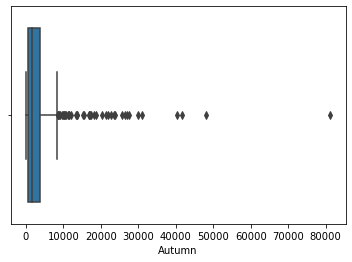

In [317]:
sns.boxplot(df2.Autumn)

In [318]:
df2['Spring'] = df2.apply(lambda x: x['09-04-2013'], axis=1)


df2['Summer'] = df2.apply(lambda x: x['29-08-2013'] + x['31-08-2013'] + x['09-06-2013'] + x['09-08-2013'] + x['10-06-2013'], axis=1)

df2['Winter'] = df2.apply(lambda x: x['09-02-2013'] + x['09-12-2013'] + x['10-12-2013'], axis=1)

df2['Autumns'] = df2.apply(lambda x: x['09-10-2013'] + x['14-09-2013'] + x['16-09-2013'] + x['18-09-2013'] + x['20-09-2013'] + x['22-09-2013'] + x['24-09-2013'] + x['28-09-2013'], axis=1)

In [319]:
df2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,10-06-2013,10-08-2013,10-10-2013,10-12-2013,total_sales,Autumn,Spring,Summer,Winter,Autumns
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3897,3923.0,3985.0,4048,75979.0,41598.0,2660.0,13899.0,9658.0,26857.0
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,3911,4024.0,4125.0,4277,52256.0,29838.0,750.0,6216.0,6405.0,17311.0
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,11,11.0,11.0,11,223.0,125.0,7.0,40.0,28.0,82.0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1952,1955.0,1959.0,1963,39691.0,21998.0,1455.0,7213.0,5012.0,14411.0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,2544,2614.0,2693.0,2736,44077.0,23661.0,1396.0,7706.0,5678.0,14676.0


In [323]:
df2[['Summer','Spring','Autumns','Winter']].describe()

,Summer,Spring,Autumns,Winter
count,479.000000,479.000000,477.000000,478.000000
mean,1444.482255,299.791232,2837.616352,990.878661
std,2976.993959,601.716515,5010.790796,1851.691244
min,2.000000,1.000000,1.000000,0.000000
25%,156.500000,28.500000,406.000000,122.000000
50%,518.000000,110.000000,1329.000000,400.000000
75%,1475.500000,308.500000,3122.000000,1097.000000
max,35577.000000,7374.000000,55532.000000,20388.000000


In [326]:
df2[['Summer']].max() - df2[['Summer']].quantile(.99)

Summer    21623.0
dtype: float64

In [327]:
df2[['Spring']].max() - df2[['Spring']].quantile(.99)

Spring    4717.12
dtype: float64

In [328]:
df2[['Autumns']].max() - df2[['Autumns']].quantile(.99)

Autumns    31528.2
dtype: float64

In [329]:
df2[['Winter']].max() - df2[['Winter']].quantile(.99)

Winter    11469.97
dtype: float64

In [365]:
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [367]:
df1.groupby('Price')['Rating'].mean()

Price
Average      3.464167
High         2.914286
Low          3.692121
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

In [369]:
df1.Style.value_counts()#vintage

Casual      219
Sexy         66
party        51
cute         44
vintage      25
bohemian     23
work         17
Brief        17
sexy          7
Novelty       6
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

In [370]:
df1.groupby('Style')['Rating'].median()

Style
Brief       4.60
Casual      4.60
Flare       0.00
Novelty     2.10
OL          0.00
Sexy        4.55
bohemian    4.60
cute        4.55
fashion     4.00
party       4.70
sexy        4.50
vintage     4.60
work        4.70
Name: Rating, dtype: float64

In [372]:
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [376]:
df2.columns

Index(['Dress_ID', '29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013',
       '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013',
       '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013',
       '26-09-2013', '28-09-2013', '30-09-2013', '10-02-2013', '10-04-2013',
       '10-06-2013', '10-08-2013', '10-10-2013', '10-12-2013', 'total_sales',
       'Autumn', 'Spring', 'Summer', 'Winter', 'Autumns'],
      dtype='object')

In [378]:
df1111=pd.merge(df2[['Dress_ID','Spring', 'Summer', 'Winter', 'Autumns']],df1[['Dress_ID','Recommendation']],how='left',on='Dress_ID')

In [384]:
df1111.groupby('Recommendation')['Spring', 'Summer', 'Winter', 'Autumns'].mean()

,Spring,Summer,Winter,Autumns
Recommendation,,,,
0,298.051095,1430.149635,985.660584,2840.193431
1,302.117073,1463.639024,997.887255,2834.137931


In [385]:
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [386]:
df1.Size = df1.Size.apply(lambda x:'Medium' if x=='M' else x)
df1.Size = df1.Size.apply(lambda x:'Large' if x=='L' else x)
df1.Size = df1.Size.apply(lambda x:'Extra large' if x=='XL' else x)
df1.Size = df1.Size.apply(lambda x:'Free' if x=='Free' else x)
df1.Size = df1.Size.apply(lambda x:'Small' if x=='S' else x)
df1.Size = df1.Size.apply(lambda x:'Small' if x=='s' else x)
df1.Size = df1.Size.apply(lambda x:'Small' if x=='small' else x)
df1.Size.value_counts()

Medium         171
free           165
Large           93
Small           36
Extra large     14
Name: Size, dtype: int64

In [387]:
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [392]:
df1.groupby('Size')['Recommendation'].count()

Size
Extra large     14
Large           93
Medium         171
Small           36
free           165
Name: Recommendation, dtype: int64

In [402]:
df1.groupby(['Style','Price'])['Recommendation'].mean()

Style     Price    
Brief     Average      0.333333
          Low          0.000000
Casual    Average      0.345455
          High         0.666667
          Low          0.382022
          Medium       0.666667
          very-high    0.500000
Flare     Average      0.500000
Novelty   Average      0.400000
          Medium       1.000000
OL        Medium       0.000000
Sexy      Average      0.344828
          High         0.000000
          Low          0.515152
          Medium       0.000000
          very-high    0.000000
bohemian  Average      0.333333
          Low          0.666667
          Medium       1.000000
          very-high    1.000000
cute      Average      0.380952
          High         0.666667
          Low          0.500000
          Medium       1.000000
fashion   Average      0.000000
party     Average      0.666667
          High         0.333333
          Medium       0.800000
          very-high    0.823529
sexy      Average      0.500000
          Low       

In [403]:
df1.columns

Index(['Dress_ID', 'Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'Material', 'FabricType', 'Decoration', 'Pattern Type',
       'Recommendation'],
      dtype='object')

In [404]:
df1111=pd.merge(df2[['Dress_ID','Spring', 'Summer', 'Winter', 'Autumns']],df1[['Dress_ID','Recommendation','Material']],how='left',on='Dress_ID')

In [405]:
df1111

,Dress_ID,Spring,Summer,Winter,Autumns,Recommendation,Material
0,1.006033e+09,2660.0,13899.0,9658.0,26857.0,1,NaN
1,1.212192e+09,750.0,6216.0,6405.0,17311.0,0,microfiber
2,1.190381e+09,7.0,40.0,28.0,82.0,0,polyster
3,9.660060e+08,1455.0,7213.0,5012.0,14411.0,1,silk
4,8.763395e+08,1396.0,7706.0,5678.0,14676.0,0,chiffonfabric
...,...,...,...,...,...,...,...
474,9.905592e+08,60.0,203.0,144.0,565.0,0,acrylic
475,7.133920e+08,560.0,1478.0,810.0,3800.0,1,polyster
476,5.328743e+08,734.0,2005.0,1214.0,5290.0,1,cotton
477,6.554649e+08,254.0,769.0,516.0,2117.0,1,silk


In [407]:
df1111.groupby('Material').mean()

,Dress_ID,Spring,Summer,Winter,Autumns,Recommendation
Material,,,,,,
acrylic,1.015895e+09,249.666667,940.666667,652.000000,2209.333333,0.000000
cashmere,7.165291e+08,78.000000,362.500000,246.250000,730.000000,0.750000
chiffonfabric,7.478669e+08,834.125000,3845.500000,2375.583333,6831.625000,0.333333
cotton,8.936418e+08,264.486486,1275.047297,889.513514,2564.675676,0.432432
lace,5.739234e+08,350.000000,1773.000000,1127.000000,3046.000000,0.000000
linen,1.052781e+09,353.666667,1785.666667,1241.000000,3336.000000,0.000000
lycra,1.035195e+09,186.333333,1074.666667,796.333333,2127.666667,0.333333
microfiber,9.991265e+08,275.000000,2151.333333,2190.333333,5989.000000,0.333333
milksilk,9.092811e+08,361.400000,1754.400000,1204.800000,3421.400000,0.200000


In [408]:
df1111.columns

Index(['Dress_ID', 'Spring', 'Summer', 'Winter', 'Autumns', 'Recommendation',
       'Material'],
      dtype='object')

In [410]:
df1111.describe()

,Dress_ID,Spring,Summer,Winter,Autumns,Recommendation
count,4.790000e+02,479.000000,479.000000,478.000000,477.000000,479.000000
mean,9.022420e+08,299.791232,1444.482255,990.878661,2837.616352,0.427975
std,1.822352e+08,601.716515,2976.993959,1851.691244,5010.790796,0.495302
min,1.234568e+08,1.000000,2.000000,0.000000,1.000000,0.000000
25%,7.666611e+08,28.500000,156.500000,122.000000,406.000000,0.000000
50%,9.096250e+08,110.000000,518.000000,400.000000,1329.000000,0.000000
75%,1.039684e+09,308.500000,1475.500000,1097.000000,3122.000000,1.000000
max,1.253973e+09,7374.000000,35577.000000,20388.000000,55532.000000,1.000000


In [412]:
df1111.groupby('Material')[ 'Summer', 'Winter', 'Recommendation'].mean()

,Summer,Winter,Recommendation
Material,,,
acrylic,940.666667,652.000000,0.000000
cashmere,362.500000,246.250000,0.750000
chiffonfabric,3845.500000,2375.583333,0.333333
cotton,1275.047297,889.513514,0.432432
lace,1773.000000,1127.000000,0.000000
linen,1785.666667,1241.000000,0.000000
lycra,1074.666667,796.333333,0.333333
microfiber,2151.333333,2190.333333,0.333333
milksilk,1754.400000,1204.800000,0.200000


In [421]:
df1111.pivot_table(index='Material',columns='Recommendation',values=['Summer', 'Winter'],aggfunc='sum')

Summer             Winter         
Recommendation        0         1        0        1
Material                                           
acrylic          2822.0       NaN   1956.0      NaN
cashmere          378.0    1072.0    278.0    707.0
chiffonfabric   51397.0   40895.0  32798.0  24216.0
cotton          85580.0  103127.0  60973.0  70675.0
lace             1773.0       NaN   1127.0      NaN
linen            5357.0       NaN   3723.0      NaN
lycra            3217.0       7.0   2383.0      6.0
microfiber       6294.0     160.0   6462.0    109.0
milksilk         7290.0    1482.0   4756.0   1268.0
mix             15815.0    1869.0  11258.0   1465.0
modal             147.0       NaN     95.0      NaN
model               NaN      50.0      NaN     43.0
nylon            5003.0    1573.0   3482.0   1299.0
other            1153.0       NaN    901.0      NaN
polyster        89552.0   41177.0  61844.0  28177.0
rayon           14569.0    3250.0   9029.0   2302.0
shiffon          1089.0     788.0    719.0    634.0
silk            10579.0   11871.0   7678.0   8481.0
sill              532.0       NaN    662.0      NaN
spandex          4925.0    1005.0   3191.0    733.0
viscos            611.0     286.0    382.0    194.0
wool              159.0       NaN    150.0      NaN

In [2]:
x =(121.92,133.21 ,141.34,126.23,175.74 )
np.mean(x)

139.68800000000002

In [5]:
np.std(x,ddof=1)

21.454952109012037